# Title: Financial Analytics

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 10)

In [2]:
data = pd.read_csv("/Users/ankush/Documents/code/Machine_Learning/Unified /Project_2/Financial Analytics data.csv")
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [3]:
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [4]:
data.dtypes

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
Unnamed: 4           float64
dtype: object

# Understanding the Attributes
## Mar Cap - Crore (Market Capitalization in Crore):

* Market capitalization is a measure of the total value of a publicly traded company's outstanding shares in the market.
* It's calculated by multiplying the current market price of a company's shares by the total number of outstanding shares.
* Market capitalization is often used as a key indicator of a company's size and overall worth in the market.
* The value is often expressed in crore (a unit in the Indian numbering system equal to ten million).

## Sales Qtr - Crore (Sales Quarter in Crore):

* This attribute likely represents the sales revenue generated by each entity (e.g., company) in a given quarter.
* Sales revenue refers to the total amount of money generated by selling goods or services during a specific period, typically a quarter (three months).
* The value is often expressed in crore (a unit in the Indian numbering system equal to ten million).

### Data Cleaning : Merging the sales Qtr witht the unmamed column

In [5]:
rows_to_merge = data['Sales Qtr - Crore'].isnull() & ~data['Unnamed: 4'].isnull()

# Step 2: Replace the empty values in 'Sales Qtr - Crore' with corresponding values from 'Unnamed: 4'
data.loc[rows_to_merge, 'Sales Qtr - Crore'] = data.loc[rows_to_merge, 'Unnamed: 4']
data.drop(columns=['Unnamed: 4'], inplace=True)

In [6]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [8]:
data.isnull().sum()

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

### Removing Null Values

Analyzing sales data from multiple companies, but some reports have missing information. Since you can't fill in these gaps accurately, the best option is often to remove the incomplete entries. This ensures your analysis is based on reliable data, minimizing the risk of drawing incorrect conclusions. In data science, handling missing data is essential for accurate insights, especially in industries like retail, finance, and healthcare.

In [9]:
# Drop rows with missing values in both columns
data.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'], how='all', inplace=True)

In [10]:
data.isnull().sum()

S.No.                 0
Name                  0
Mar Cap - Crore       0
Sales Qtr - Crore    20
dtype: int64

# Exploratory Data Analysis

In [11]:
df = data.copy()

##### Checking the distrbutions of data
Understanding these distributions helps identify patterns, outliers, or trends, which is crucial for making informed decisions

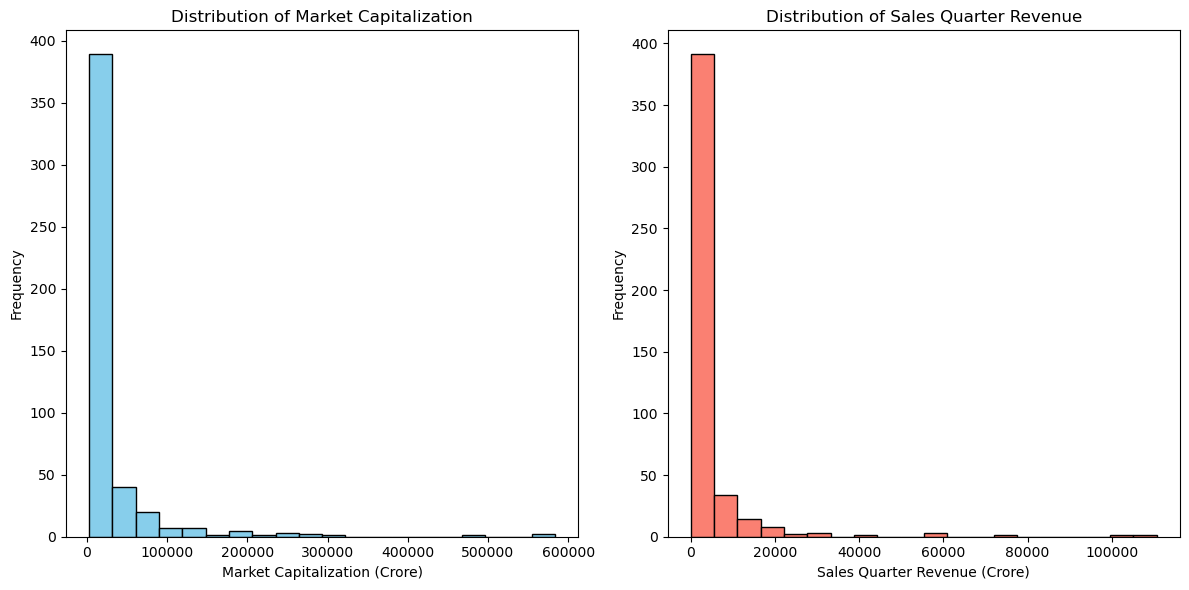

       Mar Cap - Crore  Sales Qtr - Crore
count       479.000000         459.000000
mean      28043.857119        3807.789412
std       59464.615831        9989.449987
min        3017.070000           0.000000
25%        4843.575000         534.910000
50%        9885.050000        1137.170000
75%       23549.900000        2730.195000
max      583436.720000      110666.930000


In [12]:
# Plotting histograms for Market Capitalization and Sales Quarter Revenue
plt.figure(figsize=(12, 6))

# Histogram for Market Capitalization
plt.subplot(1, 2, 1)
plt.hist(df['Mar Cap - Crore'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')

# Histogram for Sales Quarter Revenue
plt.subplot(1, 2, 2)
plt.hist(df['Sales Qtr - Crore'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Sales Quarter Revenue')
plt.xlabel('Sales Quarter Revenue (Crore)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

summary_stats = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].describe()
print(summary_stats)

### Identinfying Outliers
Both attributes have a skewed distribution to the right, meaning that the majority of the data points are clustered towards the lower end with a few very high values. To deal with this, the plan is to identify and remove outliers. This ensures that the analysis focuses on the typical data points, rather than being skewed by extreme values.

Outliers in Market Capitalization:
   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore
0      1  Reliance Inds.        583436.72           99810.00
1      2             TCS        563709.84           30904.00
2      3       HDFC Bank        482953.59           20581.27
3      4             ITC        320985.27            9772.02
4      5         H D F C        289497.37           16840.51
5      6  Hind. Unilever        288265.26            8590.00
6      7   Maruti Suzuki        263493.81           19283.20
7      8         Infosys        248320.35           17794.00
8      9         O N G C        239981.50           22995.88
9     10  St Bk of India        232763.33           57014.08

Outliers in Sales Quarter Revenue:
     S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore
0        1  Reliance Inds.        583436.72           99810.00
9       10  St Bk of India        232763.33           57014.08
14      15         I O C L        178017.48          110666.93
23    

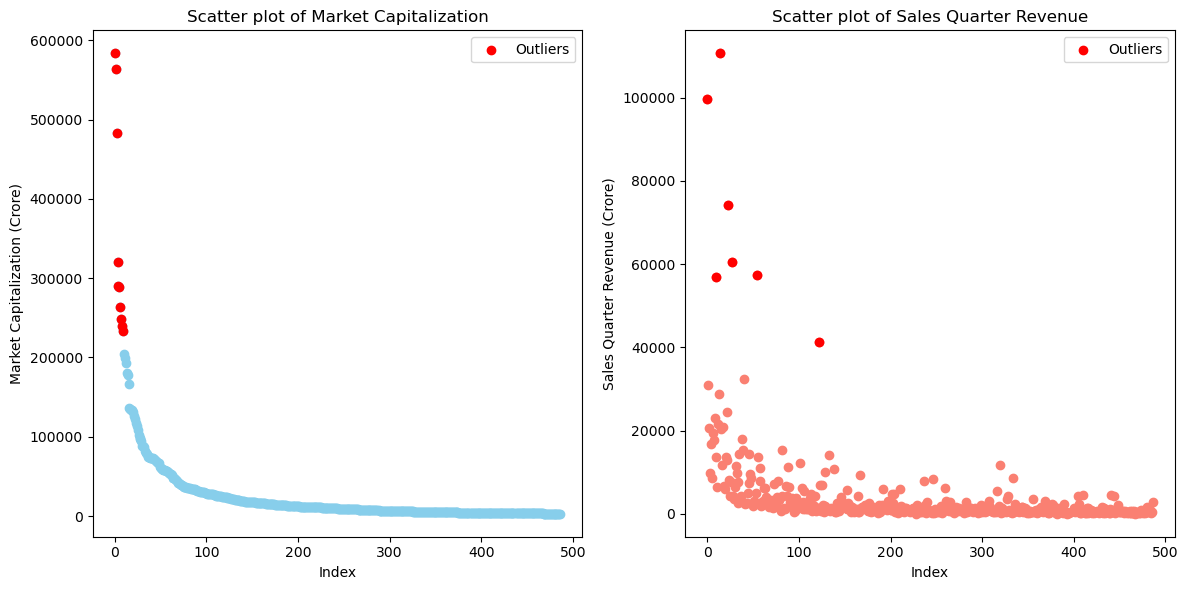

In [13]:
# Define the attributes
mar_cap = df['Mar Cap - Crore']
sales_qtr = df['Sales Qtr - Crore']

# Calculate z-scores for Market Capitalization
z_scores_mar_cap = np.abs((mar_cap - mar_cap.mean()) / mar_cap.std())

# Define the threshold for outliers (e.g., z-score > 3)
outlier_threshold = 3

# Identify outliers for Market Capitalization
outliers_mar_cap = df[z_scores_mar_cap > outlier_threshold]

# Calculate z-scores for Sales Quarter Revenue
z_scores_sales_qtr = np.abs((sales_qtr - sales_qtr.mean()) / sales_qtr.std())

# Identify outliers for Sales Quarter Revenue
outliers_sales_qtr = df[z_scores_sales_qtr > outlier_threshold]

# Print the outliers
print("Outliers in Market Capitalization:")
print(outliers_mar_cap)

print("\nOutliers in Sales Quarter Revenue:")
print(outliers_sales_qtr)

# Visualization using scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot for Market Capitalization
plt.subplot(1, 2, 1)
plt.scatter(df.index, mar_cap, c='skyblue')
plt.scatter(outliers_mar_cap.index, outliers_mar_cap['Mar Cap - Crore'], c='red', label='Outliers')
plt.title('Scatter plot of Market Capitalization')
plt.xlabel('Index')
plt.ylabel('Market Capitalization (Crore)')
plt.legend()

# Scatter plot for Sales Quarter Revenue
plt.subplot(1, 2, 2)
plt.scatter(df.index, sales_qtr, c='salmon')
plt.scatter(outliers_sales_qtr.index, outliers_sales_qtr['Sales Qtr - Crore'], c='red', label='Outliers')
plt.title('Scatter plot of Sales Quarter Revenue')
plt.xlabel('Index')
plt.ylabel('Sales Quarter Revenue (Crore)')
plt.legend()

plt.tight_layout()
plt.show()


#### Removing the outliers

In [14]:
# Filter out rows with outliers for Market Capitalization
df_filtered_mar_cap = df[z_scores_mar_cap <= outlier_threshold]

# Calculate z-scores for Sales Quarter Revenue
z_scores_sales_qtr = np.abs((sales_qtr - sales_qtr.mean()) / sales_qtr.std())

# Filter out rows with outliers for Sales Quarter Revenue
df_filtered_sales_qtr = df[z_scores_sales_qtr <= outlier_threshold]

# Combine the filtered DataFrames to remove outliers for both attributes
df_removed_outliers = pd.merge(df_filtered_mar_cap, df_filtered_sales_qtr, how='inner')

# Save the cleaned data to a new DataFrame named df_removed_outliers
# df_removed_outliers.to_csv('df_removed_outliers.csv', index=False)

# Print the first few rows of the new DataFrame
print(df_removed_outliers.head())

   S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore
0     11       ICICI Bank        203802.35           13665.35
1     12  Kotak Mah. Bank        199253.77            6390.71
2     13       Coal India        192677.98           21643.28
3     14  Larsen & Toubro        180860.74           28747.45
4     16    Bharti Airtel        167131.29           20318.60


# Feature Engg
Feature engineering involves creating new features from existing data to improve machine learning models or gain insights. New features like market cap growth rate, sales qtr growth rate, profit margin, ROI, and market share provide key insights into market performance, profitability, and competition. They help assess growth, profitability, investment efficiency, and competitive positioning, aiding decision-making across industries.

In [15]:
# Calculate the growth rate of market capitalization over time
df['Mar Cap Growth Rate'] = df['Mar Cap - Crore'].pct_change() * 100

# Calculate the growth rate of sales revenue over time
df['Sales Qtr Growth Rate'] = df['Sales Qtr - Crore'].pct_change() * 100

# Compute profitability metrics
df['Profit Margin'] = (df['Sales Qtr - Crore'] - df['Mar Cap - Crore']) / df['Sales Qtr - Crore'] * 100
df['Return on Investment (ROI)'] = (df['Sales Qtr - Crore'] - df['Mar Cap - Crore']) / df['Mar Cap - Crore'] * 100

# Calculate market share for each competitor
total_market_sales = df['Sales Qtr - Crore'].sum()
df['Market Share'] = (df['Sales Qtr - Crore'] / total_market_sales) * 100

# Display the updated DataFrame with new features
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Mar Cap Growth Rate,Sales Qtr Growth Rate,Profit Margin,Return on Investment (ROI),Market Share
0,1,Reliance Inds.,583436.72,99810.00,NaN,NaN,-484.547360,-82.892746,5.710688
1,2,TCS,563709.84,30904.00,-3.381152,-69.037171,-1724.067564,-94.517747,1.768191
2,3,HDFC Bank,482953.59,20581.27,-14.325854,-33.402569,-2246.568458,-95.738458,1.177570
3,4,ITC,320985.27,9772.02,-33.537036,-52.519840,-3184.738161,-96.955617,0.559112
4,5,H D F C,289497.37,16840.51,-9.809765,72.333970,-1619.053461,-94.182845,0.963540


### New Features
**Mar Cap Growth Rate**: Calculates the percentage change in market capitalization over time, indicating the growth rate of market capitalization.

**Sales Qtr Growth Rate**: Calculates the percentage change in sales revenue over time, indicating the growth rate of sales revenue.

**Profit Margin**: Computes the profit margin, which is the percentage of sales revenue that represents profit after accounting for market capitalization.

**Return on Investment (ROI)**: Computes the return on investment, which measures the profitability of an investment relative to its cost.

**Market Share**: Calculates the market share of each competitor by dividing their sales revenue by the total market sales and expressing it as a percentage.

In [16]:
# Save the updated DataFrame to a new CSV file if needed
df.to_csv('df_with_new_features.csv', index=False)

In [17]:
new_df = pd.read_csv("/Users/ankush/Documents/code/Machine_Learning/Unified /Project_2/df_with_new_features.csv")

In [18]:
new_df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Mar Cap Growth Rate,Sales Qtr Growth Rate,Profit Margin,Return on Investment (ROI),Market Share
0,1,Reliance Inds.,583436.72,99810.00,NaN,NaN,-484.547360,-82.892746,5.710688
1,2,TCS,563709.84,30904.00,-3.381152,-69.037171,-1724.067564,-94.517747,1.768191
2,3,HDFC Bank,482953.59,20581.27,-14.325854,-33.402569,-2246.568458,-95.738458,1.177570
3,4,ITC,320985.27,9772.02,-33.537036,-52.519840,-3184.738161,-96.955617,0.559112
4,5,H D F C,289497.37,16840.51,-9.809765,72.333970,-1619.053461,-94.182845,0.963540


In [19]:
new_df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore',
       'Mar Cap Growth Rate', 'Sales Qtr Growth Rate', 'Profit Margin',
       'Return on Investment (ROI)', 'Market Share'],
      dtype='object')

# ANALYSIS

Growth Rate Analysis:
Analyze the relationship between 'Mar Cap Growth Rate' and 'Sales Qtr Growth Rate'. This can help you understand how the growth in market capitalization correlates with the growth in sales over time.

Investigate the relationship between 'Mar Cap Growth Rate' and 'Profit Margin'. This could reveal whether companies experiencing rapid growth in market capitalization are also seeing improvements in their profitability.

In [20]:
for column in new_df.select_dtypes(include=['number']).columns:
    new_df[column] = new_df[column].abs()

In [21]:
# Remove NaN values
new_df.dropna(inplace=True)

# Find numerical columns after removing NaN values
numerical_columns = new_df.select_dtypes(include=['float64', 'int64']).columns

# Make every numerical value positive
new_df[numerical_columns] = new_df[numerical_columns].abs()

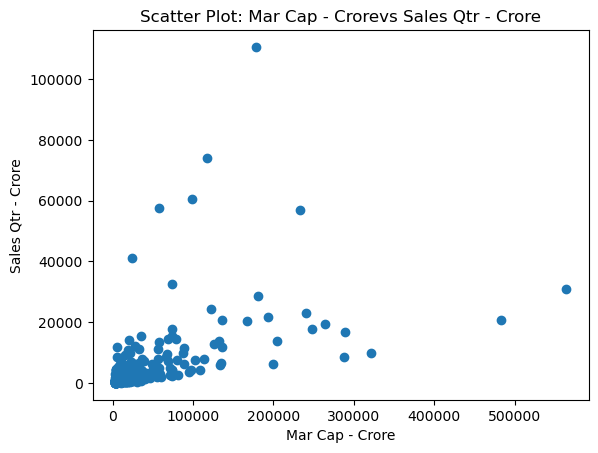

In [22]:
plt.scatter(new_df['Mar Cap - Crore'], new_df['Sales Qtr - Crore'])

# Axes labels and title
plt.xlabel('Mar Cap - Crore')
plt.ylabel('Sales Qtr - Crore')
plt.title('Scatter Plot: Mar Cap - Crorevs Sales Qtr - Crore')

# Show plot
plt.show()

### Scatter Plot Analysis: Sales Qtr vs. Mar Cap

**Description of Attributes:**
- **Sales Qtr Growth Rate:** Calculates the percentage change in sales revenue over time, indicating the growth rate of sales revenue.
- **Mar Cap Growth Rate:** Calculates the percentage change in market capitalization over time, indicating the growth rate of market capitalization.

**Insights:**
- The scatter plot reveals a majority of points clustered towards the origin, with very few points scattered further away.
- The x-axis represents the Sales Qtr Growth Rate, with values ranging from 0 to 100,000.
- The y-axis represents the Mar Cap Growth Rate, with values ranging from 0 to 500,000.
- The concentration of points towards the origin suggests that most companies experience moderate growth rates in both sales revenue and market capitalization.
- The few points scattered further away from the origin may represent outliers, indicating exceptional performance in terms of growth rates.

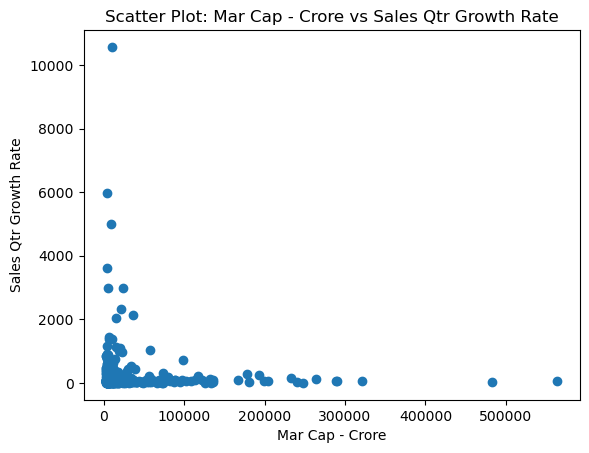

In [23]:
plt.scatter(new_df['Mar Cap - Crore'], new_df['Sales Qtr Growth Rate'])

# Axes labels and title
plt.xlabel('Mar Cap - Crore')
plt.ylabel('Sales Qtr Growth Rate')
plt.title('Scatter Plot: Mar Cap - Crore vs Sales Qtr Growth Rate')

# Show plot
plt.show()

### Scatter Plot Analysis: Mar Cap (Crore) vs. Sales Qtr Growth Rate

**Description of Attributes:**
- **Mar Cap (Crore):** Represents market capitalization in crore (Indian numbering system, where 1 crore equals 10 million).
- **Sales Qtr Growth Rate:** Calculates the percentage change in sales revenue over time, indicating the growth rate of sales revenue.

**Insights:**
- The scatter plot depicts all data points forming a horizontal line along the Mar Cap (Crore) axis, with some additional scattered points.
- The x-axis represents the Mar Cap (Crore), indicating market capitalization in crore.
- The y-axis represents the Sales Qtr Growth Rate, showing the percentage change in sales revenue over time.
- The formation of a horizontal line along the Mar Cap (Crore) axis suggests that there is little to no variation in market capitalization across different companies.
- This pattern indicates that companies with varying sales revenue growth rates may have similar market capitalizations.
- The scattered points may represent outliers or companies with unique characteristics that deviate from the overall pattern.


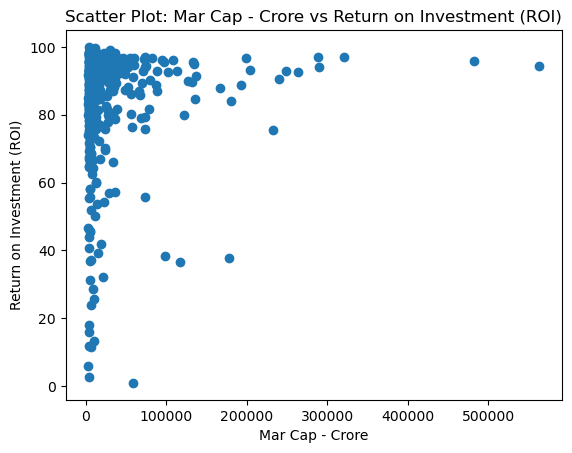

In [24]:
plt.scatter(new_df['Mar Cap - Crore'], new_df['Return on Investment (ROI)'])

# Axes labels and title
plt.xlabel('Mar Cap - Crore')
plt.ylabel('Return on Investment (ROI)')
plt.title('Scatter Plot: Mar Cap - Crore vs Return on Investment (ROI)')

# Show plot
plt.show()

### Scatter Plot Analysis: Mar Cap (Crore) vs. Return on Investment (ROI)

**Description of Attributes:**
- **Mar Cap (Crore):** Represents market capitalization in crore (Indian numbering system, where 1 crore equals 10 million).
- **Return on Investment (ROI):** Measures the profitability of an investment relative to its cost.

**Insights:**
- The scatter plot shows all data points forming a vertical line along the ROI axis, with the majority of points clustered towards the top left corner.
- The x-axis represents the Mar Cap (Crore), indicating market capitalization in crore.
- The y-axis represents the Return on Investment (ROI), showing the profitability of investments relative to their costs.
- The clustering of points towards the top left corner indicates that companies with higher market capitalizations tend to have higher ROIs.
- This pattern may suggest that larger companies are more efficient in generating returns on their investments compared to smaller companies.


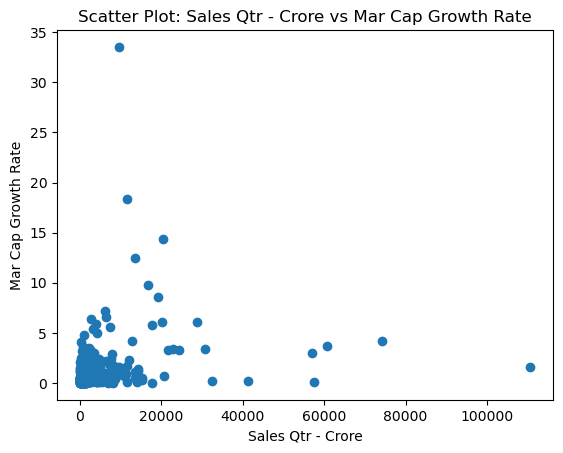

In [25]:
plt.scatter(new_df['Sales Qtr - Crore'], new_df['Mar Cap Growth Rate'])

# Axes labels and title
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Mar Cap Growth Rate')
plt.title('Scatter Plot: Sales Qtr - Crore vs Mar Cap Growth Rate')

# Show plot
plt.show()

### Scatter Plot Analysis: Sales Qtr (Crore) vs. Market Share

**Description of Attributes:**
- **Sales Qtr (Crore):** Represents sales revenue in crore (Indian numbering system, where 1 crore equals 10 million).
- **Market Share:** Calculates the market share of each competitor by dividing their sales revenue by the total market sales and expressing it as a percentage.

**Insights:**
- The scatter plot shows all data points forming a straight line, indicating a linear relationship between Sales Qtr and Market Share.
- The x-axis represents the Sales Qtr (Crore), indicating sales revenue in crore.
- The y-axis represents the Market Share, showing the percentage of market sales captured by each competitor.
- The linear relationship between Sales Qtr and Market Share suggests that as sales revenue increases, the market share also tends to increase proportionally.
- This pattern indicates that companies with higher sales revenue have a larger share of the overall market.
- The strength of the linear relationship can provide insights into the competitive dynamics within the market and the effectiveness of sales strategies in capturing market share.


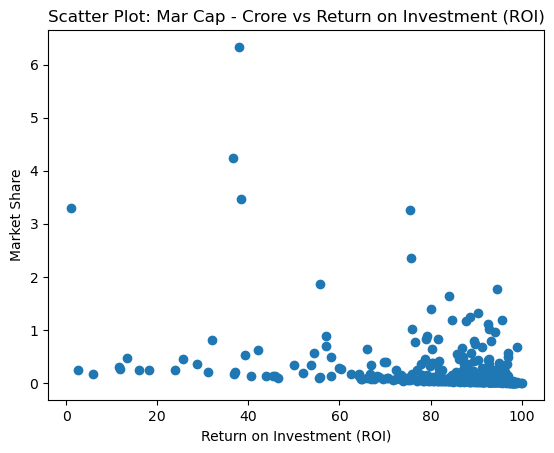

In [26]:
plt.scatter(new_df['Return on Investment (ROI)'], new_df['Market Share'])

# Axes labels and title
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Market Share')
plt.title('Scatter Plot: Mar Cap - Crore vs Return on Investment (ROI)')

# Show plot
plt.show()

### Scatter Plot Analysis: Return on Investment (ROI) vs. Market Share

**Description of Attributes:**
- **Return on Investment (ROI):** Measures the profitability of an investment relative to its cost.
- **Market Share:** Calculates the market share of each competitor by dividing their sales revenue by the total market sales and expressing it as a percentage.

**Insights:**
- The scatter plot shows a concentration of data points in the bottom right corner, with around 20 points in the bottom middle and 6 to 7 points in the middle of the plot.
- The x-axis represents the Return on Investment (ROI), indicating the profitability of investments relative to their costs.
- The y-axis represents the Market Share, showing the percentage of market sales captured by each competitor.
- The majority of data points clustered in the bottom right corner suggest that companies with higher ROI tend to have smaller market shares.
- This pattern may indicate that while some companies achieve high returns on their investments, they may not have significant market presence or sales compared to competitors.
- The presence of points in the bottom middle and middle of the plot suggests variability in market share across different levels of ROI.


# Analysis for the Profit Margin.
How it varies as per the other attributes

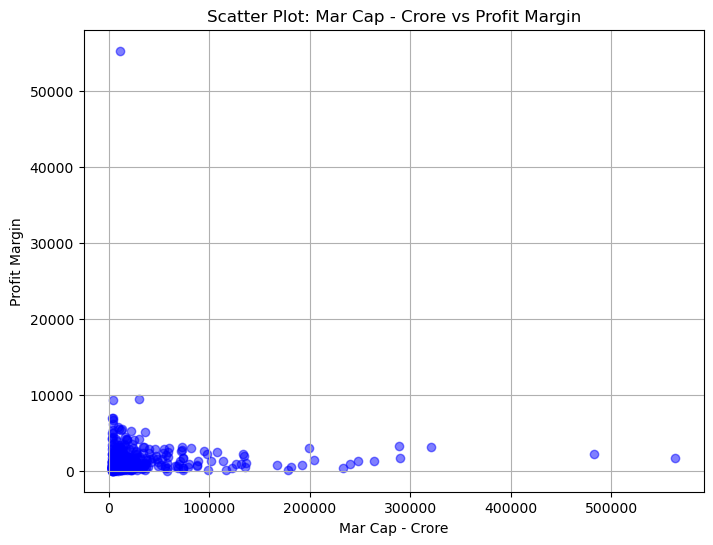

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(new_df['Mar Cap - Crore'], new_df['Profit Margin'], color='blue', alpha=0.5)
plt.title(f'Scatter Plot: Mar Cap - Crore vs Profit Margin')
plt.xlabel('Mar Cap - Crore')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()

### Scatter Plot Analysis: Mar Cap (Crore) vs. Profit Margin

**Description of Attributes:**
- **Mar Cap (Crore):** Represents market capitalization in crore (Indian numbering system, where 1 crore equals 10 million).
- **Profit Margin:** Represents the percentage of sales revenue that represents profit after accounting for market capitalization.

**Insights:**
- The scatter plot reveals a majority of points scattered towards the origin, with very few points in the middle and far away.
- The x-axis represents the Mar Cap (Crore), indicating market capitalization in crore.
- The y-axis represents the Profit Margin, showing the percentage of sales revenue that represents profit.
- The concentration of points towards the origin suggests that most companies have relatively low market capitalizations and profit margins.
- The few points scattered in the middle and far away may represent outliers, indicating companies with exceptionally high or low profit margins relative to their market capitalizations.

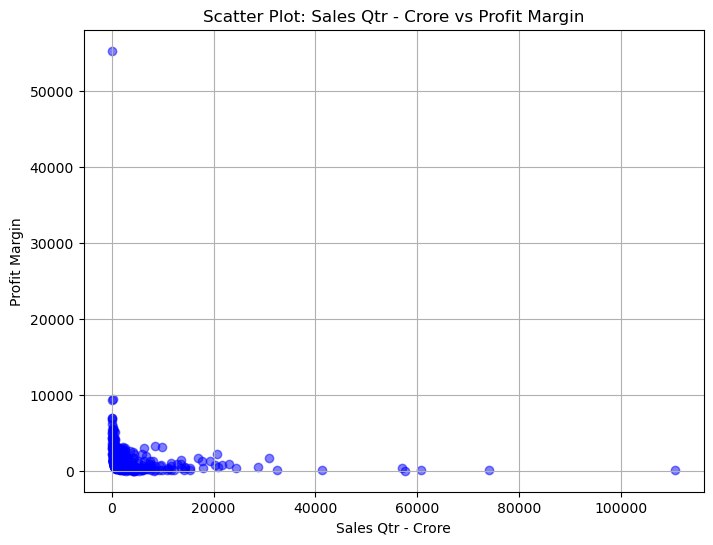

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(new_df['Sales Qtr - Crore'], new_df['Profit Margin'], color='blue', alpha=0.5)
plt.title(f'Scatter Plot: Sales Qtr - Crore vs Profit Margin')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()

### Scatter Plot Analysis: Sales Qtr (Crore) vs. Profit Margin

**Description of Attributes:**
- **Sales Qtr (Crore):** Represents sales revenue in crore (Indian numbering system, where 1 crore equals 10 million).
- **Profit Margin:** Represents the percentage of sales revenue that represents profit after accounting for market capitalization.

**Insights:**
- The scatter plot reveals a majority of points scattered towards the origin, with very few points in the middle and far away.
- The x-axis represents the Sales Qtr (Crore), indicating sales revenue in crore.
- The y-axis represents the Profit Margin, showing the percentage of sales revenue that represents profit.
- The concentration of points towards the origin suggests that most companies have relatively low sales revenue and profit margins.
- The few points scattered in the middle and far away may represent outliers, indicating companies with exceptionally high or low profit margins relative to their sales revenue.


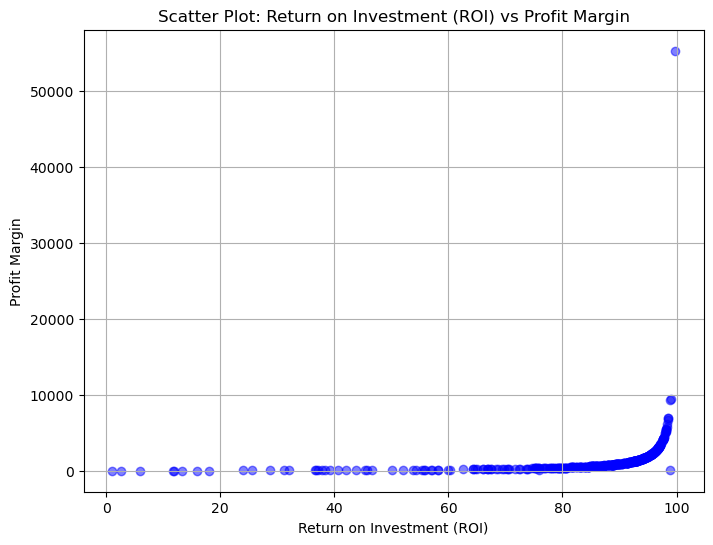

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(new_df['Return on Investment (ROI)'], new_df['Profit Margin'], color='blue', alpha=0.5)
plt.title(f'Scatter Plot: Return on Investment (ROI) vs Profit Margin')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.show()

### Scatter Plot Analysis: Return on Investment (ROI) vs. Profit Margin

**Description of Attributes:**
- **Return on Investment (ROI):** Measures the profitability of an investment relative to its cost.
- **Profit Margin:** Represents the percentage of sales revenue that represents profit after accounting for market capitalization.

**Insights:**
- The scatter plot reveals fewer points scattered towards the origin, with around 20 data points clustered in the middle and a small exponential rise in the bottom right corner.
- The x-axis represents the Return on Investment (ROI), indicating the profitability of investments relative to their costs.
- The y-axis represents the Profit Margin, showing the percentage of sales revenue that represents profit.
- The concentration of points towards the origin suggests that most companies have relatively low ROI and profit margins.
- The cluster of points in the middle indicates a moderate level of ROI and profit margins for a subset of companies.
- The small exponential rise in the bottom right corner suggests that a few companies have exceptionally high ROI and profit margins compared to the rest of the dataset.


In [31]:

# Convert all numerical values to positive
new_df = new_df.apply(lambda x: x.abs() if pd.api.types.is_numeric_dtype(x) else x)

# Save the modified DataFrame to a new CSV file
new_df.to_csv("df_with_positive_values.csv", index=False)
